# D208: Predictive Modeling
Western Governors University
<br>Bailey Psuik 
<br>January 2024

### Part I: Research Question

**A1.  Research Question**
<br>For this paper, data from a popular telecommunications company was analyzed. The company has collected data on its customers including demographic information, the services they receive, customer account information in an effort to analyze their churn rate. Churn is defined as the percentage of customers who have discontinued service with the provider. Industry-wide, annual churn rates can be as high as 25%. The company knows that it is more cost effective to retain existing customers than to acquire new ones, and therefore seeks to identify trends in customer data and uncover key metrics. 
<br><br>
One factor that may influence a customer’s decision to discontinue their service is how much data they use– their bandwidth. The company measures usage data in gigabytes (GB) per year. This paper will analyze customer bandwidth in GB per year using multiple linear regression, and answer the question: **What factors contribute to bandwidth usage per year?**


**A2.  Goals**
<br>This analysis aims to identify which factors are correlated with customers’ bandwidth usage, and the strength of those correlations. To accomplish this, multiple linear regression will be used for analysis. An initial model will be constructed with many explanatory variables. This initial model will then be reduced to identify which features, or explanatory variables, are most influential on bandwidth.
<br><br>
The overall goal in identifying these factors is to be able to make recommendations to stakeholders on how the company can increase the user experience to its high-use customers, thereby retaining their business and reducing churn rate.

### Method Justification

**B1.  Summary of assumptions**
A multiple linear regression model operates with the following assumptions (Statistics Solutions, n.d.): 
* There is a linear relationship between the explanatory variables and the response variable.
* Multivariate normality is upheld. In other words, residual values are normally distributed.
* No multivariate collinearity exists, meaning explanatory variables are not highly correlated with one another. 
* Homoscedasticity is evident. The variance of error terms are similar for each explanatory variable.


**B2.  Tool benefits**
<br>Python was selected for this analysis due to two main benefits.
* Statistical modeling capabilities (Massaron & Boschetti, 2016)): There are many useful packages in Python for aiding in the performance of statistical analysis, such as NumPy, Pandas, and others.
* Visualization capabilities: Two Python packages utilized in this project include matplotlib and seaborn, both of which are capable of producing helpful visualizations with simple syntax. Visualizing the data is an important step not only in cleaning and preparing data, but in examining the distribution of relevant variables through use of histograms, box plots, etc.


**B3.  Appropriate technique**
<br>Simple linear regression is used to explore the relationship between two variables– one response (dependent) variable and one explanatory (independent) variable. A correlation coefficient is calculated for the chosen variables and can range from -1 to 1. A correlation of -1 indicates a strong negative correlation, a correlation of 1 indicates a strong positive correlation, and a correlation of 0 indicates no relationship between the variables.
<br><br>
When analyzing a given dependent variable in a real-world scenario, it is rare that there is only one explanatory variable that impacts its outcome. Multiple linear regression can be used to analyze the simultaneous impact of multiple explanatory variables on one response variable. This analysis uses multiple linear regression, as there are likely many variables that have a significant impact on a customer's bandwidth usage. 

**C1.  Data cleaning**
<br>Before this data set is analyzed, the data must be cleaned. Skipping this vital step could result in a faulty or misleading answer to the research question posed in section A1. Goals of the data cleaning process include: 
* Perform an initial inspection of the data to get the number of rows, columns, and data types
* Identify and treating duplicate values
* Convert categorical variables to numerical variables
* Identify and treating missing values
* Identify and treating outliers

<br>The steps used to clean the data are as follows: 
<br><br>Step 1: Perform an initial inspection of the data with the .info() function. 
* Outcome: The data contains 10,000 rows and 50 columns. All variables but one, InternetService, have 10,000 non-null values. Data types of each variable are logical.

<br>Step 2: Compute a sum of the number of total duplicates contained in the data set. Additionally, since 'Customer_id' is denoted as being a unique identifier, compute the sum of duplicates in this column.
* Outcome: No duplicates were found, so no treatment was needed.

<br>Step 3: Re-express ordinal categorical variables as numerical variables.
* Outcome: 14 ordinal categorical variables had their values replaced with numerical values to prepare this data set for analysis.

<br>Step 4: Re-encode nominal categorical variables with label encoding.
* Outcome: Values for Gender, Contract, and InternetService are nominally encoded.

<br>Step 5: Treat the missing values in ‘InternetService’ detected from the initial inspection of the data.
* Outcome: The 2,129 null values found in this column were filled in using imputation of the mode, as ‘InternetService’ is a categorical variable.

<br>Step 6: Visually inspect the box plots for each quantitative variable to identify outliers. 
* Outcome: Outliers were detected in nine quantitative variables, but these values were deemed acceptable for various reasons, and were therefore retained.

<br>Complete code for the data cleaning portion of this analysis is below.

In [1]:
# Initial package import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# .csv import
churn_data = pd.read_csv("C:/Users/psuik/Desktop/WGU/D208/churn_clean.csv")

# Step 1: Profile the data for initial inspection
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [2]:
# Step 2: Identify and treat duplicate values

# Return duplicate values as True, non-duplicates as False
print(churn_data.duplicated())

# Get total counts of duplicate values
print(churn_data.duplicated().value_counts())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool
False    10000
Name: count, dtype: int64


In [3]:
# True = duplicate, False = non-duplicate
# 10,000 False values ==> No complete duplicates exist 

# Check for duplicate values in Customer_id column, since this is denoted as a unique identifier
print(churn_data['Customer_id'].duplicated())
print(churn_data['Customer_id'].duplicated().value_counts())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Customer_id, Length: 10000, dtype: bool
Customer_id
False    10000
Name: count, dtype: int64


In [4]:
# Step 3: Re-express ordinal categorical variables as numerical variables 

# Get unique values for each ordinal categorical variable
## Items 1-8 have ordinal values, but are already numerically encoded, so they will not be included
print("TimeZone:",churn_data.TimeZone.unique())
print("Churn:",churn_data.Churn.unique())
print("Techie:",churn_data.Techie.unique())
print("Port_modem:",churn_data.Port_modem.unique())
print("Tablet:",churn_data.Tablet.unique())
print("Phone:",churn_data.Phone.unique())
print("Multiple:",churn_data.Multiple.unique())
print("OnlineSecurity:",churn_data.OnlineSecurity.unique())
print("OnlineBackup:",churn_data.OnlineBackup.unique())
print("DeviceProtection:",churn_data.DeviceProtection.unique())
print("TechSupport:",churn_data.TechSupport.unique())
print("StreamingTV:",churn_data.StreamingTV.unique())
print("StreamingMovies:",churn_data.StreamingMovies.unique())
print("PaperlessBilling:",churn_data.PaperlessBilling.unique())

TimeZone: ['America/Sitka' 'America/Detroit' 'America/Los_Angeles' 'America/Chicago'
 'America/New_York' 'America/Puerto_Rico' 'America/Denver'
 'America/Menominee' 'America/Phoenix' 'America/Indiana/Indianapolis'
 'America/Boise' 'America/Kentucky/Louisville' 'Pacific/Honolulu'
 'America/Indiana/Petersburg' 'America/Nome' 'America/Anchorage'
 'America/Indiana/Knox' 'America/Juneau' 'America/Toronto'
 'America/Indiana/Winamac' 'America/Indiana/Vincennes'
 'America/North_Dakota/New_Salem' 'America/Indiana/Tell_City'
 'America/Indiana/Marengo' 'America/Ojinaga']
Churn: ['No' 'Yes']
Techie: ['No' 'Yes']
Port_modem: ['Yes' 'No']
Tablet: ['Yes' 'No']
Phone: ['Yes' 'No']
Multiple: ['No' 'Yes']
OnlineSecurity: ['Yes' 'No']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['Yes' 'No']
PaperlessBilling: ['Yes' 'No']


In [13]:
# Replicate the variables to prepare for replacing categorical values with numeric ones
churn_data['TimeZone_num']=churn_data['TimeZone']
churn_data['Churn_num']=churn_data['Churn']
churn_data['Techie_num']=churn_data['Techie']
churn_data['Port_modem_num']=churn_data['Port_modem']
churn_data['Tablet_num']=churn_data['Tablet']
churn_data['Phone_num']=churn_data['Phone']
churn_data['Multiple_num']=churn_data['Multiple']
churn_data['OnlineSecurity_num']=churn_data['OnlineSecurity']
churn_data['OnlineBackup_num']=churn_data['OnlineBackup']
churn_data['DeviceProtection_num']=churn_data['DeviceProtection']
churn_data['TechSupport_num']=churn_data['TechSupport']
churn_data['StreamingTV_num']=churn_data['StreamingTV']
churn_data['StreamingMovies_num']=churn_data['StreamingMovies']
churn_data['PaperlessBilling_num']=churn_data['PaperlessBilling']

In [14]:
# Create dictionaries for conversion. 
## *TimeZones are ranked ordinally based on a 1 hour difference relative to Puerto Rico

dict_TimeZone = {"America/Puerto_Rico": 1, 
                 "America/Detroit": 2,
                 "America/New_York": 2,
                 "America/Indiana/Indianapolis": 2, 
                 "America/Kentucky/Louisville": 2, 
                 "America/Indiana/Petersburg": 2, 
                 "America/Toronto": 2, 
                 "America/Indiana/Winamac": 2,
                 "America/Indiana/Vincennes": 2, 
                 "America/Indiana/Marengo": 2,
                 "America/Chicago": 3,
                 "America/Menominee": 3,
                 "America/Indiana/Knox": 3,
                 "America/North_Dakota/New_Salem": 3,
                 "America/Indiana/Tell_City": 3,
                 "America/Denver": 4,
                 "America/Phoenix": 4,
                 "America/Boise": 4,
                 "America/Ojinaga": 4,
                 "America/Los_Angeles": 5,
                 "America/Sitka": 6,
                 "America/Nome": 6,
                 "America/Anchorage": 6,
                 "America/Juneau": 6,
                 "Pacific/Honolulu": 7}

dict_Churn = {"No":0, "Yes":1}
dict_Techie = {"No":0, "Yes":1}
dict_Port_modem = {"No":0, "Yes":1}
dict_Tablet = {"No":0, "Yes":1}
dict_Phone = {"No":0, "Yes":1}
dict_Multiple = {"No":0, "Yes":1}
dict_OnlineSecurity = {"No":0, "Yes":1}
dict_OnlineBackup = {"No":0, "Yes":1}
dict_DeviceProtection = {"No":0, "Yes":1}
dict_TechSupport = {"No":0, "Yes":1}
dict_StreamingTV = {"No":0, "Yes":1}
dict_StreamingMovies = {"No":0, "Yes":1}
dict_PaperlessBilling = {"No":0, "Yes":1}

In [16]:
# Replace values from dictionaries
churn_data['TimeZone_num'].replace(dict_TimeZone, inplace=True)
churn_data['Churn_num'].replace(dict_Churn, inplace=True)
churn_data['Techie_num'].replace(dict_Techie, inplace=True)
churn_data['Port_modem_num'].replace(dict_Port_modem, inplace=True)
churn_data['Tablet_num'].replace(dict_Tablet, inplace=True)
churn_data['Phone_num'].replace(dict_Phone, inplace=True)
churn_data['Multiple_num'].replace(dict_Multiple, inplace=True)
churn_data['OnlineSecurity_num'].replace(dict_OnlineSecurity, inplace=True)
churn_data['OnlineBackup_num'].replace(dict_OnlineBackup, inplace=True)
churn_data['DeviceProtection_num'].replace(dict_DeviceProtection, inplace=True)
churn_data['TechSupport_num'].replace(dict_TechSupport, inplace=True)
churn_data['StreamingTV_num'].replace(dict_StreamingTV, inplace=True)
churn_data['StreamingMovies_num'].replace(dict_StreamingMovies, inplace=True)
churn_data['PaperlessBilling_num'].replace(dict_PaperlessBilling, inplace=True)

In [88]:
# Step 4: Re-encode nominal categorical variables with label encoding.
# (Great Learning, 2023)
from sklearn.preprocessing import LabelEncoder

# Fit the label encoder to categorical data for Gender and Internet Service
label_encoder_gender = LabelEncoder()
churn_data['Gender_num'] = label_encoder_gender.fit_transform(churn_data['Gender'])
churn_data['Gender_decoded'] = label_encoder_gender.inverse_transform(churn_data['Gender_num'])

label_encoder_internet = LabelEncoder()
churn_data['InternetService_num'] = label_encoder_gender.fit_transform(churn_data['InternetService'])
churn_data['InternetService_decoded'] = label_encoder_gender.inverse_transform(churn_data['InternetService_num'])

label_encoder_internet = LabelEncoder()
churn_data['Contract_num'] = label_encoder_gender.fit_transform(churn_data['Contract'])
churn_data['Contract_decoded'] = label_encoder_gender.inverse_transform(churn_data['Contract_num'])

In [24]:
# Step 5: Identify and treat missing values 

# Initial inspection of the data shows that only 7,871 out of 10,000 values for InternetService are non-null values
# This means there are 2,129 missing values in this column that must be imputed

# Imputation will be completed using the mode of 'InternetService', a nominal categorical variable
mode_InternetService = churn_data['InternetService'].mode()[0]

# Fill all null values in InternetService with the mode
churn_data['InternetService'] = churn_data['InternetService'].fillna(mode_InternetService)

# Confirm all missing values have been filled by returning the sum of null values in InternetService & InternetService_num
print(churn_data['InternetService'].isnull().sum())
print(churn_data['InternetService_num'].isnull().sum())

0
0


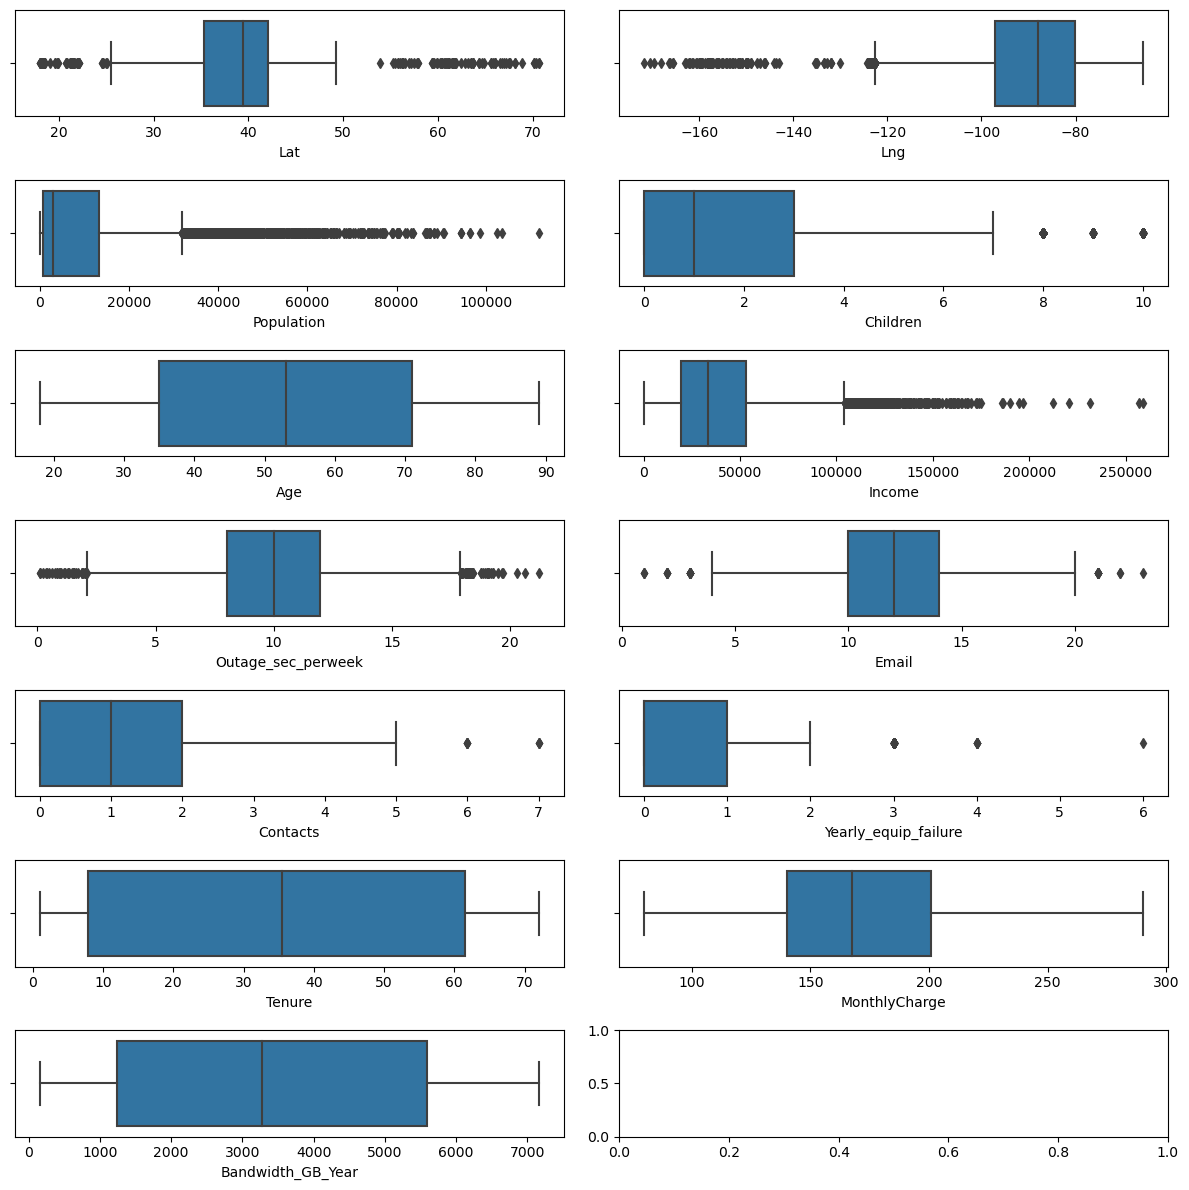

In [74]:
# Step 6: Identify and treat outliers

# Visually show outliers for each quantitative variable on respective box plots
# Import seaborn
import seaborn as sns

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 12))

plt.subplot(7, 2, 1)
sns.boxplot(x='Lat', data = churn_data)

plt.subplot(7, 2, 2)
sns.boxplot(x='Lng', data = churn_data)

plt.subplot(7, 2, 3)
sns.boxplot(x='Population', data = churn_data)

plt.subplot(7, 2, 4)
sns.boxplot(x='Children', data = churn_data)

plt.subplot(7, 2, 5)
sns.boxplot(x='Age', data = churn_data)

plt.subplot(7, 2, 6)
sns.boxplot(x='Income', data = churn_data)

plt.subplot(7, 2, 7)
sns.boxplot(x='Outage_sec_perweek', data = churn_data)

plt.subplot(7, 2, 8)
sns.boxplot(x='Email', data = churn_data)

plt.subplot(7, 2, 9)
sns.boxplot(x='Contacts', data = churn_data)

plt.subplot(7, 2, 10)
sns.boxplot(x='Yearly_equip_failure', data = churn_data)

plt.subplot(7, 2, 11)
sns.boxplot(x='Tenure', data = churn_data)

plt.subplot(7, 2, 12)
sns.boxplot(x='MonthlyCharge', data = churn_data)

plt.subplot(7, 2, 13)
sns.boxplot(x='Bandwidth_GB_Year', data = churn_data)

plt.tight_layout()

After evaluation of each count and range of outliers for the variables, it was determined that none of the outliers should be removed, as each outlier is within an acceptable or justifiable range, implying that their input is valid and was not cause of mistake or human error. Below is the justification for retention of the data set’s outliers: 
* Lat & Lng: Customers are from all over the country, so these values may be accurate as customers are more densely populated in some areas. There are no latitudes or longitudes off on their own in the boxplot so there is no cause to question these values.
* Population: Customers are from all over the country, so 100,000 is a very reasonable population number when many cities in the US have over 1,000,000 residents.
* Children: Customers are from all over the country, so 100,000 is a very reasonable population number when many cities in the US have over 1,000,000 residents.
* Income: The maximum value is just over $250k, which is a reasonable income amount.
* Outage_sec_perweek: There are many outliers here which makes sense—there are likely some customers who experience little to no outages in the average week, making up the lower range of outliers. On the other hand, if one customer is experiencing an outage, those in a certain radius of them would likely also experience an outage, explaining the high number of upper-range outliers here too. This explains the wide range of outlier values here too.
* Email: The upper and lower range of outliers here does not present anything out of the question. 
* Contacts: The upper and lower range of outliers here does not present anything out of the question. 
* Yearly_equip_failure: The maximum number of times someone’s equipment failed this year is 6, which is unfortunate, but possible.

**C2.  Summary statistics**

Summary statistics for the dependent variable, Bandwidth_GB_year are included in the code below. 

Summary statistics for each of the following independent variables are also included in the code below.
* Children 
* Age
* Income
* Outage_sec_perweek
* Yearly_equip_failure 
* Techie
* Tablet
* Phone
* Multiple
* StreamingTV
* StreamingMovies
* Tenure
* MonthlyCharge


*Dependent variable:* 
* **Bandwidth_GB_Year**: average amount of data used, in GB, per year by the customer

In [41]:
churn_data['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

*Independent variables:*
* **Children**: number of children in customer's household

In [40]:
print(churn_data['Children'].describe())
print()
print(churn_data['Children'].value_counts())

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

Children
0     2570
1     2472
2     1495
3     1472
4     1006
5      212
8      210
6      187
7      185
10      99
9       92
Name: count, dtype: int64


* **Age**: customer's age, in years

In [39]:
print(churn_data['Age'].describe())

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


* **Income**: annual income of customer, in dollars

In [38]:
print(churn_data['Children'].describe())

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64


* **Outage_sec_perweek**: average number of seconds per week a system outage occurs in a customer's neighborhood

In [36]:
print(churn_data['Outage_sec_perweek'].describe())

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64


* **Yearly_equip_failure**: number of times a customer's equipment failed or had to be replaced in the past year

In [35]:
print(churn_data['Yearly_equip_failure'].describe())

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64


* **Techie**: whether a customer considers themselves technically inclined (Yes / No)

In [34]:
print(churn_data['Techie'].describe())
print()
print(churn_data['Techie'].value_counts())

count     10000
unique        2
top          No
freq       8321
Name: Techie, dtype: object

Techie
No     8321
Yes    1679
Name: count, dtype: int64


* **Tablet**: whether the customer owns a tablet (Yes / No)

In [33]:
print(churn_data['Tablet'].describe())
print()
print(churn_data['Tablet'].value_counts())

count     10000
unique        2
top          No
freq       7009
Name: Tablet, dtype: object

Tablet
No     7009
Yes    2991
Name: count, dtype: int64


* **Phone**: whether the customer has a phone service (Yes / No)

In [32]:
print(churn_data['Phone'].describe())
print()
print(churn_data['Phone'].value_counts())

count     10000
unique        2
top         Yes
freq       9067
Name: Phone, dtype: object

Phone
Yes    9067
No      933
Name: count, dtype: int64


* **Multiple**: whether the customer has multiple lines (Yes / No)

In [31]:
print(churn_data['Multiple'].describe())
print()
print(churn_data['Multiple'].value_counts())

count     10000
unique        2
top          No
freq       5392
Name: Multiple, dtype: object

Multiple
No     5392
Yes    4608
Name: count, dtype: int64


* **StreamingTV**: whether the customer is subscribed to streaming TV (Yes / No)

In [30]:
print(churn_data['StreamingTV'].describe())
print()
print(churn_data['StreamingTV'].value_counts())

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object

StreamingTV
No     5071
Yes    4929
Name: count, dtype: int64


* **StreamingMovies**: whether the customer is subscribed to streaming movies (Yes / No)

In [29]:
print(churn_data['StreamingMovies'].describe())
print()
print(churn_data['StreamingMovies'].value_counts())

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object

StreamingMovies
No     5110
Yes    4890
Name: count, dtype: int64


* **Tenure**: length of time a customer has used the service, in months

In [28]:
print(churn_data['Tenure'].describe())

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64


* **MonthlyCharge**: amount charged to customer monthly, in dollars

In [27]:
print(churn_data['MonthlyCharge'].describe())

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


**C3. Visualizations** 
<br> Univariate visualizations for the dependent variable and all independent variables are below. Additionally, bivariate visualizations are included which compare each independent variable to the dependent variable.

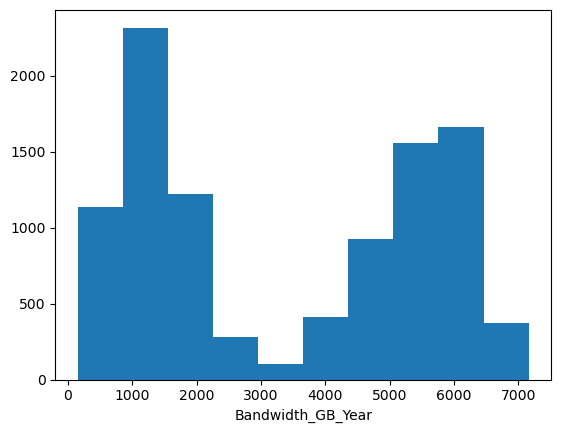

In [42]:
# Dependent variable: Bandwidth_GB_Year
plt.hist(churn_data['Bandwidth_GB_Year'])
plt.xlabel('Bandwidth_GB_Year')
plt.show()

<Axes: xlabel='Children', ylabel='Bandwidth_GB_Year'>

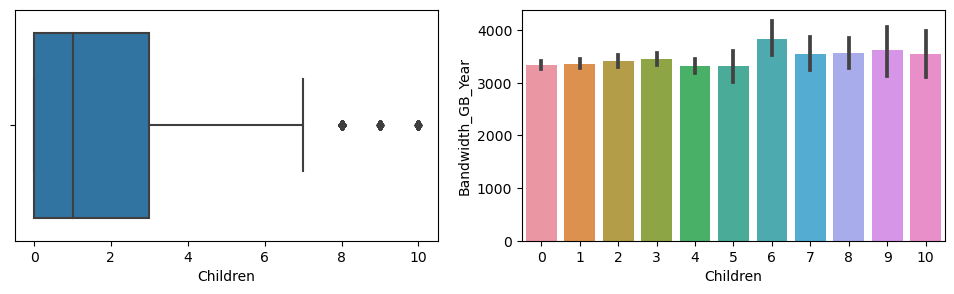

In [43]:
# Children
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x='Children', data = churn_data)

plt.subplot(1, 2, 2)
sns.barplot(x='Children',y='Bandwidth_GB_Year',data=churn_data)

<Axes: xlabel='Age', ylabel='Bandwidth_GB_Year'>

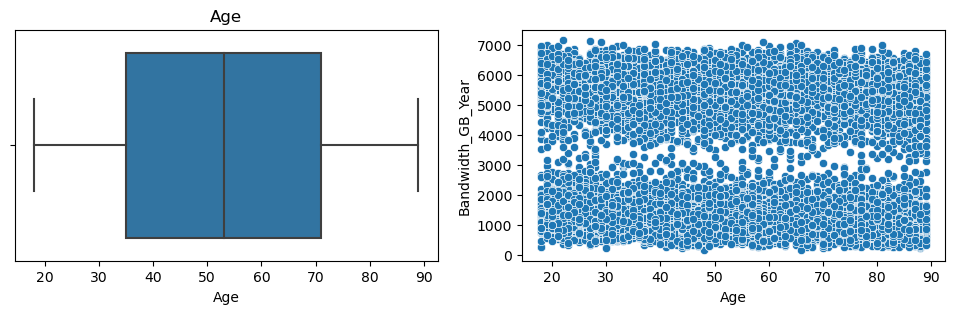

In [44]:
# Age
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x='Age', data = churn_data).set(title='Age')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age',y='Bandwidth_GB_Year',data=churn_data)

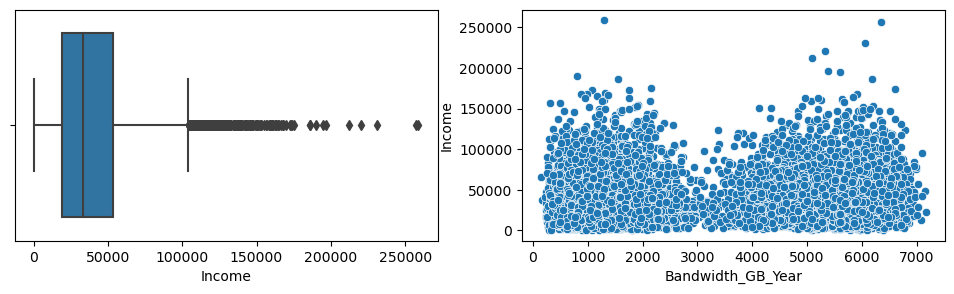

In [45]:
# Income
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x='Income', data = churn_data)

plt.subplot(1, 2, 2)
sns.scatterplot(x="Bandwidth_GB_Year", y="Income", data=churn_data)
plt.show()

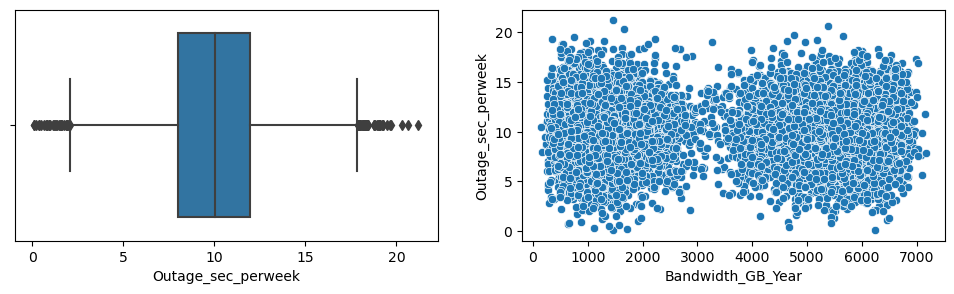

In [47]:
# Outage_sec_perweek
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x='Outage_sec_perweek', data = churn_data)

plt.subplot(1, 2, 2)
sns.scatterplot(x="Bandwidth_GB_Year", y="Outage_sec_perweek", data=churn_data)
plt.show()

<Axes: xlabel='Yearly_equip_failure', ylabel='Bandwidth_GB_Year'>

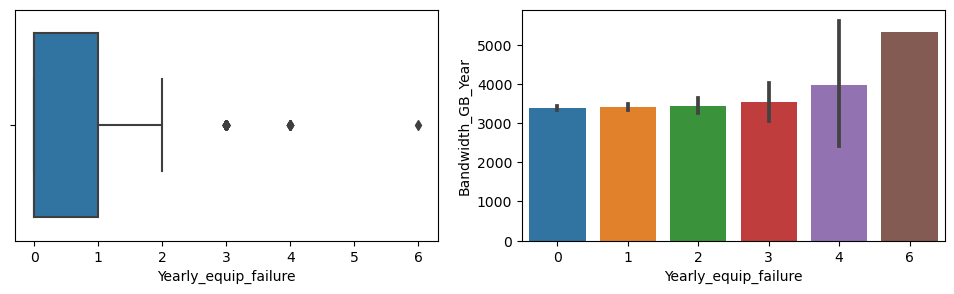

In [48]:
# Yearly_equip_failure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x='Yearly_equip_failure', data = churn_data)

plt.subplot(1, 2, 2)
sns.barplot(x='Yearly_equip_failure',y='Bandwidth_GB_Year',data=churn_data)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Techie'>

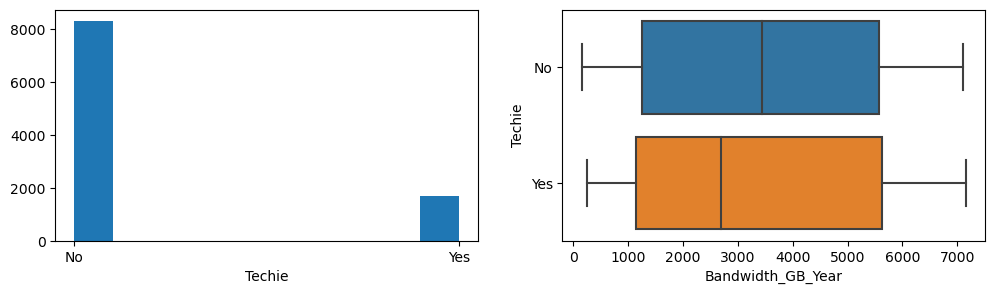

In [49]:
# Techie
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['Techie'])
plt.xlabel('Techie')

plt.subplot(1, 2, 2)
sns.boxplot(x='Bandwidth_GB_Year',y='Techie',data=churn_data)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Tablet'>

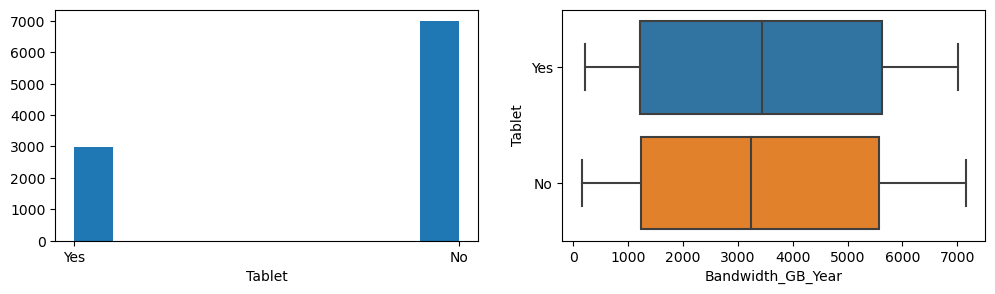

In [50]:
# Tablet
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['Tablet'])
plt.xlabel('Tablet')

plt.subplot(1, 2, 2)
sns.boxplot(x='Bandwidth_GB_Year',y='Tablet',data=churn_data)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Phone'>

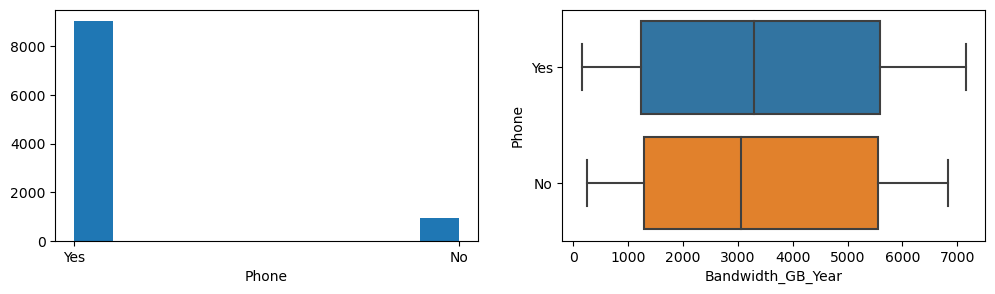

In [51]:
# Phone
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['Phone'])
plt.xlabel('Phone')

plt.subplot(1, 2, 2)
sns.boxplot(x='Bandwidth_GB_Year',y='Phone',data=churn_data)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Multiple'>

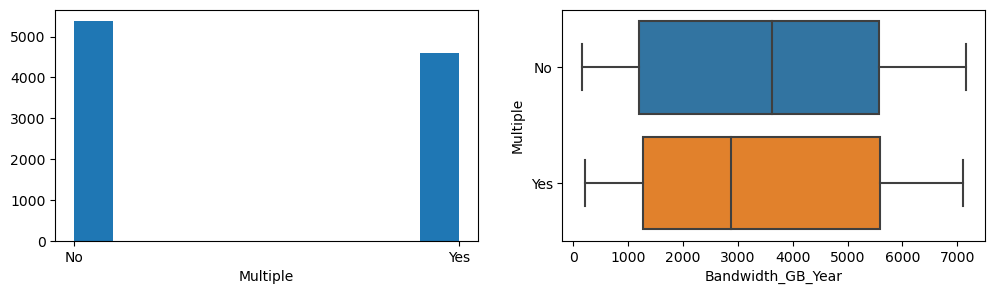

In [52]:
# Multiple
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['Multiple'])
plt.xlabel('Multiple')

plt.subplot(1, 2, 2)
sns.boxplot(x='Bandwidth_GB_Year',y='Multiple',data=churn_data)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='StreamingTV'>

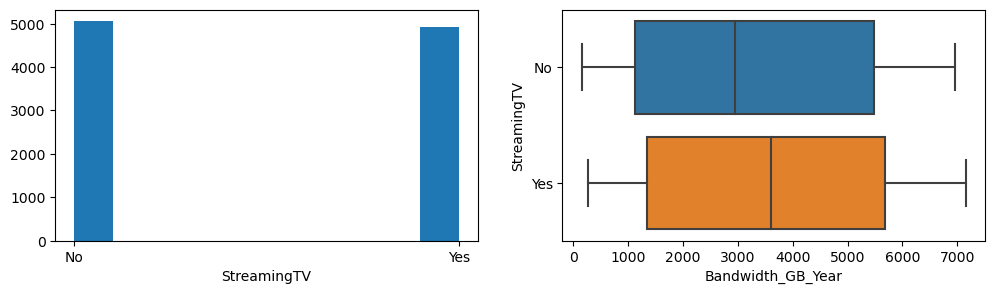

In [53]:
# StreamingTV
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['StreamingTV'])
plt.xlabel('StreamingTV')

plt.subplot(1, 2, 2)
sns.boxplot(x='Bandwidth_GB_Year',y='StreamingTV',data=churn_data)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='StreamingMovies'>

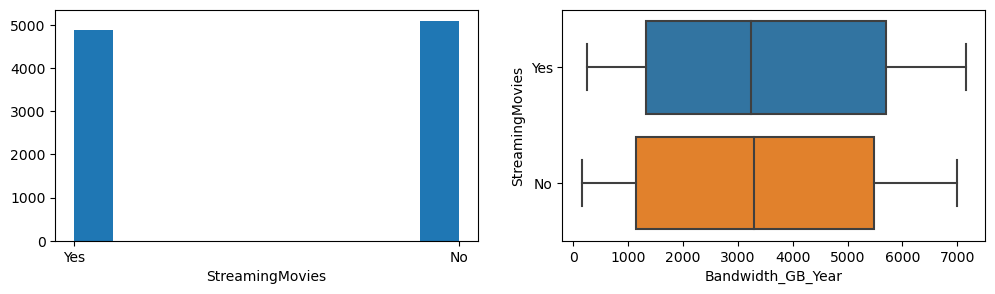

In [54]:
# StreamingMovies
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['StreamingMovies'])
plt.xlabel('StreamingMovies')

plt.subplot(1, 2, 2)
sns.boxplot(x='Bandwidth_GB_Year',y='StreamingMovies',data=churn_data)

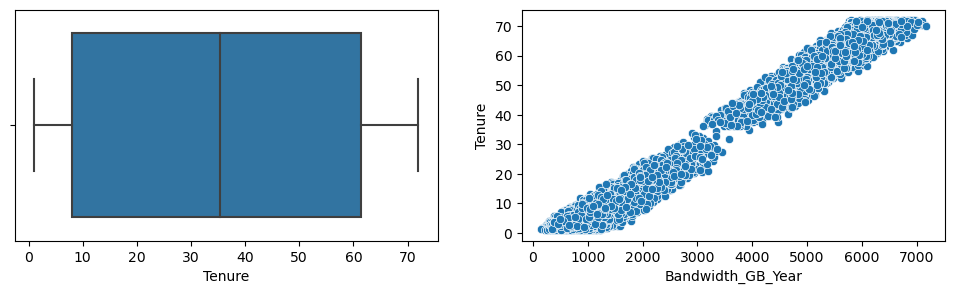

In [55]:
# Tenure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x='Tenure', data = churn_data)

plt.subplot(1, 2, 2)
sns.scatterplot(x="Bandwidth_GB_Year", y="Tenure", data=churn_data)
plt.show()

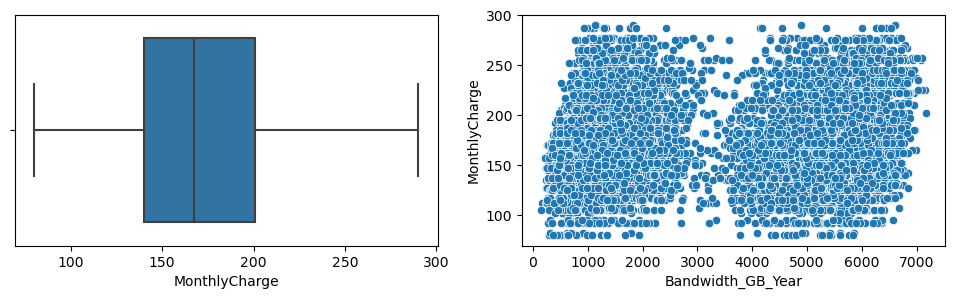

In [56]:
# MonthlyCharge
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x='MonthlyCharge', data = churn_data)

plt.subplot(1, 2, 2)
sns.scatterplot(x="Bandwidth_GB_Year", y="MonthlyCharge", data=churn_data)
plt.show()

**C4. Data transformation**
<br>Categorical variables were transformed into numerical variables to use for analysis in the code presented in section C1. These numerical variables are stored in separate columns so that the variables' original values were preserved for presentation of summary statistics and visualizations. Because of these transformations, dummy variables will not need to be encoded for creation of the model, as these variables are now prepared for use in the analysis.

**C5. Prepared data set**
<br>The preparted data set is downloadable via the code below.

In [86]:
churn_data.to_csv(r"C:/Users/psuik/Desktop/WGU/D208/churn_clean_D208p1.csv")

### Part IV: Model Comparison and Analysis

**D1. Initial model**
<br>To create the initial model, a new data frame was created to work with only the variables relevent to this analysis.

In [77]:
# New dataframe containing only the dependent variable and selected explanatory variables
df = churn_data[['Bandwidth_GB_Year', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure',
               'Tenure', 'MonthlyCharge', 'Techie_num', 'Tablet_num', 'Phone_num' , 'Multiple_num', 
                 'StreamingTV_num', 'StreamingMovies_num']].copy()
df

,Bandwidth_GB_Year,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Techie_num,Tablet_num,Phone_num,Multiple_num,StreamingTV_num,StreamingMovies_num
0,904.536110,0,68,28561.99,7.978323,1,6.795513,172.455519,0,1,1,0,0,1
1,800.982766,1,27,21704.77,11.699080,1,1.156681,242.632554,1,1,1,1,1,1
2,2054.706961,4,50,9609.57,10.752800,1,15.754144,159.947583,1,0,1,1,0,1
3,2164.579412,1,48,18925.23,14.913540,0,17.087227,119.956840,1,0,1,0,1,0
4,271.493436,0,83,40074.19,8.147417,1,1.670972,149.948316,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6511.252601,3,23,55723.74,9.415935,0,68.197130,159.979400,0,1,1,1,0,0
9996,5695.951810,4,48,34129.34,6.740547,0,61.040370,207.481100,0,0,1,1,1,0
9997,4159.305799,1,48,45983.43,6.590911,0,47.416890,169.974100,0,0,1,1,0,0
9998,6468.456752,1,39,16667.58,12.071910,0,71.095600,252.624000,0,1,0,1,1,1


This new data frame will be used throughout the model-building process below.

In [78]:
# (Keith, 2021)

# Import statsmodels.api
import statsmodels.api as sm

# Create new variable for the dependent variable
label = "Bandwidth_GB_Year"

# Assign dependent variable to y
y = df.Bandwidth_GB_Year

# Assign all numeric features to X
# Add a column of 1's to create y-intercept, with .assign(const=1)
X = df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure',
               'Tenure', 'MonthlyCharge', 'Techie_num', 'Tablet_num', 'Phone_num' , 'Multiple_num', 
                 'StreamingTV_num', 'StreamingMovies_num']].assign(const=1)

# Create model object with two parameters: y and X
model = sm.OLS(y, X)

# Model.fit() runs the regression calculation. Save results as such
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.907e+04
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:51:50   Log-Likelihood:                -67865.
No. Observations:               10000   AIC:                         1.358e+05
Df Residuals:                    9986   BIC:                         1.359e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.8244 

In [59]:
# Add a column of predicted values based on the model created above
df['Predictions'] = results.fittedvalues
df

,Bandwidth_GB_Year,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Techie_num,Tablet_num,Phone_num,Multiple_num,StreamingTV_num,StreamingMovies_num,Predictions
0,904.536110,0,68,28561.99,7.978323,1,6.795513,172.455519,0,1,1,0,0,1,968.339667
1,800.982766,1,27,21704.77,11.699080,1,1.156681,242.632554,1,1,1,1,1,1,974.996697
2,2054.706961,4,50,9609.57,10.752800,1,15.754144,159.947583,1,0,1,1,0,1,1936.964343
3,2164.579412,1,48,18925.23,14.913540,0,17.087227,119.956840,1,0,1,0,1,0,1902.372408
4,271.493436,0,83,40074.19,8.147417,1,1.670972,149.948316,0,0,0,0,1,0,515.677212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6511.252601,3,23,55723.74,9.415935,0,68.197130,159.979400,0,1,1,1,0,0,6113.303754
9996,5695.951810,4,48,34129.34,6.740547,0,61.040370,207.481100,0,0,1,1,1,0,5707.298546
9997,4159.305799,1,48,45983.43,6.590911,0,47.416890,169.974100,0,0,1,1,0,0,4271.552225
9998,6468.456752,1,39,16667.58,12.071910,0,71.095600,252.624000,0,1,0,1,1,1,6678.887246


In [60]:
# Currently the coefficients are not comparable because they are on different scales
# To fix this: values must be normalized

# Import preprocessing from sklearn
from sklearn import preprocessing

# Create a new data frame for calculated z-scores for each variable
df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df), columns=df.columns)
df_zscore.head()

,Bandwidth_GB_Year,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Techie_num,Tablet_num,Phone_num,Multiple_num,StreamingTV_num,StreamingMovies_num,Predictions
0,-1.138487,-0.972338,0.720925,-0.398778,-0.679978,0.946658,-1.048746,-0.003943,-0.449198,1.530805,0.320781,-0.924445,-0.985899,1.022247,-1.114664
1,-1.185876,-0.506592,-1.259957,-0.641954,0.570331,0.946658,-1.262001,1.630326,2.226191,1.530805,0.320781,1.081730,1.014302,1.022247,-1.111603
2,-0.612138,0.890646,-0.148730,-1.070885,0.252347,0.946658,-0.709940,-0.295225,2.226191,-0.653251,0.320781,1.081730,-0.985899,1.022247,-0.669247
3,-0.561857,-0.506592,-0.245359,-0.740525,1.650506,-0.625864,-0.659524,-1.226521,2.226191,-0.653251,0.320781,-0.924445,1.014302,-0.978237,-0.685154
4,-1.428184,-0.972338,1.445638,0.009478,-0.623156,0.946658,-1.242551,-0.528086,-0.449198,-0.653251,-3.117389,-0.924445,1.014302,-0.978237,-1.322818


In [62]:
# Re-run the model using the data frame of z-scores
## This normalized model will be the initial model
y = df_zscore.Bandwidth_GB_Year
X = df_zscore.drop(columns=["Bandwidth_GB_Year", "Predictions"]).assign(const=1)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.907e+04
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:16:16   Log-Likelihood:                 9029.5
No. Observations:               10000   AIC:                        -1.803e+04
Df Residuals:                    9986   BIC:                        -1.793e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                 0.0303 

**D2. Justification of model reduction**
<br> The original model contains 13 explanatory variables. However, not all of these variables are relevant to the model. In this step, only the most relevant, or most influential, variables will be retained. The first step in this process will be to calculate the variance inflation factor (VIF) for each variable. VIF helps to determine multicollinearity. If a variable has a high VIF (greater than 10) it will be removed, as a high VIF indicates high correlation. 

In [63]:
# Using VIF to check for multicollinearity
# VIF: variance inflation factor = 1 / (1-R2)
# (Keith, 2021)

def vif(df):
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    
    # Initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # Loop through each column (excluding 'const')
    for col in df.drop(columns=['const']):
        # Form input data for each exogenous variable
        y = df[col]
        X = df.drop(columns=[col])
    
        # Extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # Calculate VIF
        # Prevent division by zero runtime error
        if r_squared < 1: 
            vif = 1 / (1 - r_squared)
        else: 
            vif = 100
        vif_dict[col] = vif
    
        # Calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[col] = tolerance

    # Generate the DataFrame to return
    df_output = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})
    
    return df_output.sort_values(by=['VIF'], ascending=False)

In [64]:
# Calculate VIF for X
vif(X)

,VIF,Tolerance
MonthlyCharge,4.076092,0.245333
StreamingMovies_num,2.525227,0.396004
StreamingTV_num,1.969509,0.507741
Multiple_num,1.594861,0.627014
Tablet_num,1.002207,0.997798
Age,1.001807,0.998196
Phone_num,1.001741,0.998262
Children,1.001676,0.998327
Techie_num,1.000932,0.999069
Outage_sec_perweek,1.000918,0.999083


The general rule for VIF treatment is to remove any variables with a VIF greater than 10. The lower the VIF score, the better. Generally, a score less than 10 is adequate; less than 5 is good; and less than 3 is ideal (Keith, 2021). As shown above, the highest VIF is just over 4, so all variables will be retained in this step.

The next step in feature selection was to perform recursive feature elimination (RFE). RFE searches and analyzes each feature in order to return a subset of the best-performing features in the original model (Paul, 2020). RFE is calculated in the following code.

In [65]:
# Recursive feature elimination (RFE)
# (Paul, 2020) 

# Import dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Feature extraction: Select the top 5 features
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True  True False False False  True False False False False False  True
  True False]
Feature Ranking: [ 1  1  4  6  8  1  3  7  9  5  2  1  1 10]


**D3. Reduced linear regression model**

Section D2 shows the top 5 independent variables with the highest influence on the dependent variable. For the reduced model, these five variables were used. All variables were retained after the VIF step. It should be noted that 5 was the selected number of variables for this analysis, but more or less than that could have been used. The following code drops the additional columns that were identified as less-relevant in the code above, and runs the model only with the top five most influential variables. The code and corresponding output is below.

In [67]:
# REDUCED MODEL with top 5 variables 
# Running the reduced model with X2, which includes only the 5 variables identified in RFE
y = np.log(df.Bandwidth_GB_Year)
X2 = df[['Children', 'Age', 'Tenure', 'Multiple_num', 'StreamingTV_num']].assign(const=1)

print(sm.OLS(y,X2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:19:51   Log-Likelihood:                -187.84
No. Observations:               10000   AIC:                             387.7
Df Residuals:                    9994   BIC:                             430.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Children            0.0171      0.001     

**E1. Model comparison** 

The R-squared value indicates the percentage of variance in the dependent variable (Bandwidth_GB_Year) that is explained by the independent variables. The initial model, with 13 independent variables, returned an R-squared value of 0.990. The reduced model, with just 5 independent variables, returned an R-squared value of 0.913. While an R-squared of 0.913 is relatively high, as values range from 0 to 1 with 1 being the best fit, the reduced model shows a comparatively worse fit than the initial model. 

The adjusted R-squared values for both the initial and reduced models are also 0.990 and 0.913, respectively. The adjusted R-squared is a modified version of R-squared which takes into account the number of variables in regression. This value increases when additional variables add explanatory power. As stated previously, the reduced model is a worse fit than the initial model.

The p-value, which indicates the overall significance of the regression, was 0.00 for both the initial and the reduced model. This indicates that the regression model is statistically significant, or meaningful, as a p-value of 0.00 is indeed less than 0.05, the standard significance level used for determination of significance. Based on this model evaluation element, it can be stated that both of these models are statistically significant. This information will be used to help answer the original research question.

**E2. Output and calculations**
<br> The code used for this analysis is provided throughout the preceding sections of this paper, along with its corresponding output.

Additionally, a residual plot is created below, comparing both the predicted and actual values for 'Bandwidth_GB_Year'.

Text(0, 0.5, 'Residuals')

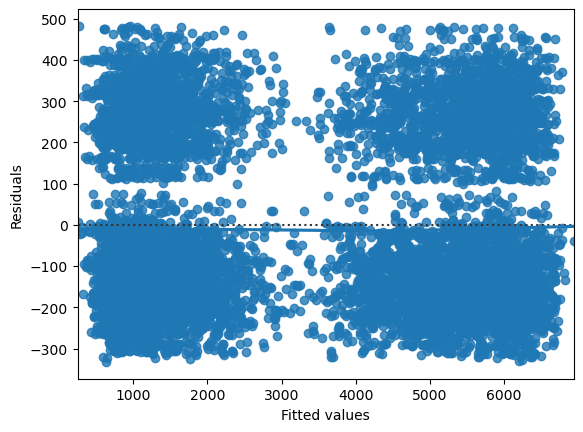

In [69]:
sns.residplot(x="Predictions", y="Bandwidth_GB_Year", data=df, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

The residual standard error (RSE) measures of the typical size of residuals, that is how much the predictions are typically off by. The smaller the RSE, the more accurate the model is at predicting outcomes of the dependent variable. The RSE for this model is calculated below:

In [70]:
# (DataCamp, n.d.)

mse = results.mse_resid

rse = np.sqrt(mse)
print("Residual standard error: ", rse)

Residual standard error:  0.09815727626335523


An RSE of 0.0982 indicates that this model's predicted values of Bandwidth_GB_Year are typically off by approximately 9.8%.

**E3. Code**

Code for each step in this analysis is provided in the appropriate sections above.

### Part V: Data Summary and Implications

**F1. Results**
<br>The research question posed in section A1 -- **What factors contribute to bandwidth usage per year?** -- can now be answered. Based on the outcome of the reduced multiple linear regression model in section D3, **Children**, **Age**, **Tenure**, **Multiple**, and **StreamingTV** are the factors that contribute to a customer's annual bandwidth usage.

The regression equation for the reduced model is as follows: 
<br>**Bandwidth_GB_Year = 6.7703 + 0.0171(Children) - 0.0017(Age) + 0.0301(Tenure) + 0.0511(Multiple) + 0.1232(StreamingTV)**

Interpretation of the coefficients: 
* When all other variables are 0, a customer's estimated bandwidth usage per year is 6.7703 GB.
* All else equal, annual bandwidth usage increases by 0.0171 GB per 1 **child**.
* All else equal, annual bandwidth usage decreases by 0.0017 GB per 1 year of customer **age**.
* All else equal, annual bandwidth usage increases by 0.0301 GB per 1 month of **tenure**.
* All else equal, if a customer subscribes to **multiple lines**, their annual bandwidth usage increases by 0.051 GB.
* All else equal, if a customer subscribes to **TV streaming**, their annual bandwidth usage increases by 0.1232 GB.

<br> As noted in section E1, the reduced model is found to be statistically significant. Both the p-value for the overall model, and the p-values for each individual variable are below the threshold of 0.05, indicating significance of the variables used in the model. 
<br><br> Before it can be determined if the model is practically significant or not, the assumptions of linear regression models must be verified. To check for a linear relationship between the explanatory variables and the response variable, the visualizations found in section C3 were analyzed. Based on these visualizations, it is evident that Tenure is the only explanatory variable that has a linear relationship with Bandwidth_GB_Year. Therefore, this assumption is not met. 
<br><br> Next, multivariate normality is determined by analysis of the residual plot found in section E2. Upon inspection of this plot, it is clear that the residual values are not normally distributed. Therefore, this assumption is not met either. 
<br><br> Multivariate collinearity for the reduced model is inspected in the correlation matrix below: 

In [81]:
X2.corr()

,Children,Age,Tenure,Multiple_num,StreamingTV_num,const
Children,1.000000,-0.029732,-0.005091,-0.021969,-0.007106,NaN
Age,-0.029732,1.000000,0.016979,-0.004674,-0.000197,NaN
Tenure,-0.005091,0.016979,1.000000,-0.010422,0.002440,NaN
Multiple_num,-0.021969,-0.004674,-0.010422,1.000000,0.003097,NaN
StreamingTV_num,-0.007106,-0.000197,0.002440,0.003097,1.000000,NaN
const,NaN,NaN,NaN,NaN,NaN,NaN


This matrix demonstrates low correlation coefficients between each of the respective variables. Therefore, the assumption that little to no multivariate collinearity exists is upheld. 
<br><br>Homoscedasticity of the model is determined by whether the variance of error terms is similar for each variable. Based on the residual plot created in section E2, it is clear that this assumption is also not met.
<br><br> After determining that only three out of four assumptions are met for this model, this model does not meet the standards for being practically significant. Due to its failure to meet assumptions, this model's results are not applicable to other practical scenarios.

An overarching limitation of regression models is that correlation does not equal causation. The model created here indicates which variables are most correlated with Bandwidth_GB_Year, but it cannot be said that *because* a customer subscribes to TV streaming, they use more GB annually, or that *because* a customer gets one year older, they use less GB annually. An additional limitation of this model is that the outliers for quantitative variables were left in. While no outliers are present in the variables used in the reduced model, these outliers could have had an impact on the initial model, which would in turn affect the reduced model. 

**F2. Recommendations**
<br>
Although the model is statistically significant, its lack of practical significance means that viable recommendations for the business cannot be made. In order to reach a point of practical significance, it is recommended that additional explanatory variables be analyzed so that the assumptions of multiple linear regression can be met, in order to get a more accurate answer as to which variables meaningully contribute to a customer's bandwidth usage annually.
<br><br> 
If anything can be taken from this analysis however, it is that Tenure was found to have a positive linear correlation with bandwidth use. Based on this, it is recommended that the company continue to focus on retaining customers, as the longer a customer has used the service, the more data they use, and will therefore remain signed on as customers. 

**G. Panopto demonstration**
<br> A Panopto video demonstrating and explaining use of the code included here is included separately.

**H. Sources of third-party code**
<br>
[Mark Keith]. (2021, October 11). Python: Intro to MLR / OLS in statsmodels.Api [Video]. YouTube. https://www.youtube.com/watch?v=0-fkgpK2knA&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=8

[Mark Keith]. (2021, October 11). Python: MLR with categorical values; dummy codes [Video]. YouTube. https://www.youtube.com/watch?v=tJCgvR4E7uc&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=9

[Mark Keith]. (2021, October 11). Python: MLR, OLS, standardization, normalization [Video]. YouTube. https://www.youtube.com/watch?v=QH_elD_JKuc&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=10

[Mark Keith]. (2021, October 11). Python: MLR/OLS assumptions normality multicollinearity VIF [Video]. YouTube. https://www.youtube.com/watch?v=9-M4SGzSx0k&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=11

(2023, November 8). Label Encoding in Python – 2024. Great Learning. Retrieved January 5, 2023, from https://www.mygreatlearning.com/blog/label-encoding-in-python/

Paul, S. (2020, January 1). Python Feature Selection Tutorial: A Beginner's Guide. DataCamp. Retrieved January 1, 2024, from https://www.datacamp.com/tutorial/feature-selection-python


**I. Sources**
<br> 
Massaron, L., & Boschetti, A. (2016). Regression Analysis with Python. Packt Publishing.

(n.d.). Introduction to Regression with statsmodels in Python: Quantifying model fit. DataCamp. Retrieved January 2, 2024, from https://campus.datacamp.com/courses/introduction-to-regression-with-statsmodels-in-python/assessing-model-fit-e78fd9fe-6303-4048-8748-33b19c4222fe?ex=1

Paul, S. (2020, January 1). Python Feature Selection Tutorial: A Beginner's Guide. DataCamp. Retrieved January 1, 2024, from https://www.datacamp.com/tutorial/feature-selection-python

Statistics Solutions (n.d.). Assumptions of Multiple Linear Regression. Complete Dissertation. Retrieved January 1, 2024, from https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-multiple-linear-regression/